In [1]:
from keras.models import load_model
from yolo import yolo_model
import numpy as np
import cv2
from utils import WeightReader, decode_netout, draw_boxes
ANCHORS = [0.57273, 0.677385, 1.87446, 2.06253, 3.33843, 5.47434, 7.88282, 3.52778, 9.77052, 9.16828]
import matplotlib.pyplot as plt
%matplotlib inline

yolo_model.load_weights("weights_yolo_crater.h5")

Using TensorFlow backend.


## Visualize detection on a sample image:

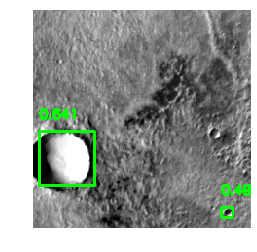

In [2]:
dummy_array = np.zeros((1,1,1,1,20,4))

image = cv2.imread('./images_test/image_2476.jpg')
input_image = image / 255.
input_image = input_image[:,:,::-1]
input_image = np.expand_dims(input_image, 0)

netout = yolo_model.predict([input_image, dummy_array])

boxes = decode_netout(netout[0], 
                      obj_threshold=0.3, # try different values
                      nms_threshold=.01,
                      anchors=ANCHORS, 
                      nb_class=1)
image = draw_boxes(image, boxes, labels=["crater"])

plt.imshow(image[:,:,::-1]); 
plt.axis('off')
plt.show()